In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-style-data/Final_data.csv
/kaggle/input/life-style-data/meal_metadata.csv


In [2]:
#the model we're using, Linear Regression
from sklearn.linear_model import LinearRegression
#this specifies the path for python to read the file
burn_path = "../input/life-style-data/Final_data.csv"
#using pandas, reads the csv file and places it in a variable
#there are way too much entries in the original csv file so I used nrows to use only the first 500
data = pd.read_csv(burn_path, nrows=500)
data

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,50.00,Female,70.93,1.55,160.20,142.75,58.06,0.74,651.20,Cardio,...,2347.49,0.499512,1.657550,0.829156,0.891074,1197.80,48.228851,502.6968,6.770141e+19,Medium
496,57.92,Male,90.14,1.72,199.14,150.43,55.01,0.90,892.62,Strength,...,2505.75,0.500225,1.385733,0.662041,0.755398,1311.38,60.386074,603.5040,6.089191e+19,Low
497,31.39,Male,49.59,1.62,181.88,156.51,51.76,0.56,369.26,Yoga,...,1574.22,0.499320,1.582375,0.805026,0.860512,832.74,39.372599,394.1504,9.044447e+19,High
498,55.15,Male,130.46,1.73,187.08,155.10,59.97,0.69,455.40,Yoga,...,2007.35,0.498767,0.772727,0.748407,0.829057,2837.60,84.799000,499.2288,1.132964e+20,Very High


In [3]:
#A list of the features I've chosen
features_list = ["Age", "BMI", "Fat_Percentage", "Session_Duration (hours)", "Workout_Frequency (days/week)", "Sets", "Reps"]
#places the features into the X variable
X = data[features_list]
#shows the list of only the selected features
X

,Age,BMI,Fat_Percentage,Session_Duration (hours),Workout_Frequency (days/week),Sets,Reps
0,34.91,24.87,26.800377,1.00,3.99,4.99,20.91
1,23.37,23.48,27.655021,1.37,4.00,4.01,16.15
2,33.20,21.15,24.320821,0.91,2.99,5.00,21.90
3,38.69,32.45,32.813572,1.10,3.99,4.01,16.92
4,45.09,14.83,17.307319,1.08,4.00,4.99,15.01
...,...,...,...,...,...,...,...
495,50.00,29.52,32.005003,0.74,2.01,5.00,24.03
496,57.92,30.47,33.008571,0.90,1.96,3.97,22.89
497,31.39,18.90,20.603753,0.56,1.98,4.01,20.98
498,55.15,43.59,35.000000,0.69,3.02,4.97,16.04


In [4]:
#the calories burned value is now set to the y variable, or target
y = data.Calories_Burned

In [5]:
from sklearn.model_selection import train_test_split

#splitting the data into two
#test size lets us split it into 80% training data and 20% testing data
#random state can be any number, this just lets us get the same result every time
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.2, random_state = 5)

#creates the linear regression model
lr=LinearRegression()

#trains the model, this is how the model learns to create the predicted values
lr.fit(train_X, train_y)

#predicts the scores based on the features, then prints the results so we can compare with the actual results
y_pred = lr.predict(test_X)
print("Predictions:", lr.predict(X.head()))
print("Actual results:\n", + y.head())

Predictions: [1057.37893383 1441.73863905  873.5925536  1139.80443998 1145.07263577]
Actual results:
 0    1080.90
1    1809.91
2     802.26
3    1450.79
4    1166.40
Name: Calories_Burned, dtype: float64


In [6]:
#the predicted results are a little bit off from the actual results, so I'll use some metrics to evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

#r2 score, variance of the target explained by the features
#How well the model fits the data, goes from 0-1. The higher the number, the better.
r2 = r2_score(test_y, y_pred)
print("r2 score:", r2)


#mean squared error, squared distance between the predicted and actual values. Lower is better.
mse = mean_squared_error(test_y, y_pred)
print("Mean Squared Error:", mse)

#mean absolute error, absolute distance between the predicted and actual values. Lower is better.
mae = mean_absolute_error(test_y, y_pred)
print("Mean Absolute Error:", mae)

r2 score: 0.6832307086761118
Mean Squared Error: 94709.24795405946
Mean Absolute Error: 238.67825301712912


Text(0.5, 1.0, 'Predicted vs Actual Values (Linear Regression)')

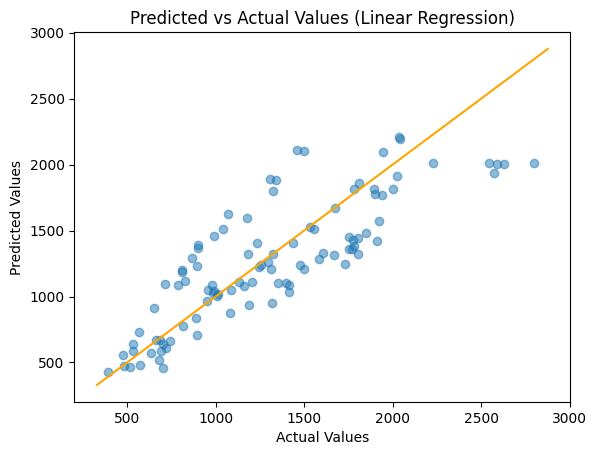

In [7]:
import matplotlib.pyplot as plt

#plot predicted vs actual values
#predicted values of the target are plotted on the x-axis, actual values are plotted on the y-axis
#if we see something closer to a  diagonal line, we can infer a good linear relationship

plt.scatter(test_y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = "orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values (Linear Regression)")

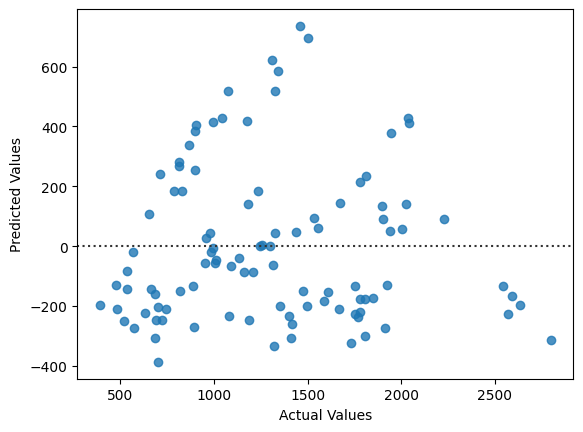

In [8]:
import seaborn as sns
sns.residplot(x=test_y, y=y_pred, data=data)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


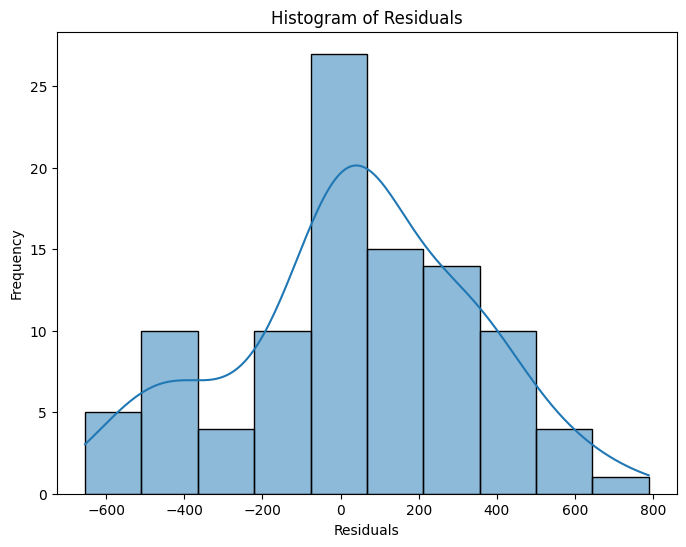

In [9]:
#Computes Residuals, which is the difference between the actual values and estimated values
residuals = test_y - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In this notebook, I am using a lifestyle dataset to predict the amount of calories burned. First, I'll import the model we need which is linear regression. Using linear regression, we can see the relationship between independent variables and a target variable.

The dataframe of our CSV showing a lot of data. There are 20000 entries and each entry has 54 columns. I used the nrows parameter earlier to take only the first 500 entries to make things simpler.

We don't need all of these features in the dataset as they are either not relevant, have low relevancy or have no numerical data, such as workout type, equipment, body part, workout, and others. The features I want to use to predict calories burned are things that deal with a person's physical features such as age, BMI, fat percentage/muscle mass, and workout intensity such as duration, frequency, sets, and reps. Some features like gender may play a role in the predictions which I can convert into a boolean that will show a 0 or a 1. However, I already have more than enough useful features so I chose six of them and dropped the others such as less relevant ones, for simplicity's sake.

Next, I will take the target, our calories burned, and store it into our y variable then I'll take our features and place them into our X variable. We split the data we have to training and testing sets. I placed the test size to 20% as the general convention for splitting the data is an 80-20 split. Random state can be any number, but if we want the results to remain constant we should use the same on every time. After we fit the data to the model we then predict the results. We can compare our predictions to the actual results and see how well our model did.

Another way to evaluate our model is to use metrics. These metrics can show us the quality of our model in a simple way.
For Mean Absolute Error and Mean Squared Error, it shows us how close each predictions are to the actual value. The smaller the value for these two, the closer our predictions are to the actual value.

For R2 score, we can see how well our target value is affected by our features value. In simpler terms, how well an increase or decrease in our features can change our target. The range of the R2 score varies from 0-1, with numbers being closer to 1 being more ideal.

To easily see how well our model did, we can use a visualization.
We can see here in the graph that our dots are grouped together near the line as it goes up, showing a good linear relationship with the features to the target.

We also have a residuals graph and plot that shows us the difference of our actual values and predicted values. 

In conclusion, we can safely say that a person's age, physical properties, and workout intensity such as duration, sets, reps are directly linked to calories burned and with these values we can predict how much we can burn.